In [1]:
#%% import necessary packages
import os
import tensorflow as tf

In [2]:
#%% read in the training data 
# Directory with our training rose pictures
train_rose_dir = os.path.join('/home/hankui/Dropbox/Ongoing/flowers_recognition_hankui/flowers/rose')

# Directory with our training sunflower pictures
train_sunflower_dir = os.path.join('/home/hankui/Dropbox/Ongoing/flowers_recognition_hankui/flowers/sunflower')


#%% check how the file names look like
train_rose_names = os.listdir(train_rose_dir)
train_sunflower_names = os.listdir(train_sunflower_dir)

print(train_rose_names[:10])
print(train_sunflower_names[:10])

['18492322571_3b99e55560_n.jpg', '19988406792_68201f76e3_n.jpg', '7461899002_a3b21d0770_n.jpg', '5578766623_542c91dfaa_n.jpg', '5001852101_877cb2ae9b_n.jpg', '5349859602_1ab3356c64_n.jpg', '14001990976_bd2da42dbc.jpg', '5002461124_dc5988bbc9_n.jpg', '563847503_89e9756c80.jpg', '410425647_4586667858.jpg']
['28661674053_44f8034570_n.jpg', '20078317834_6e0983c0f5_n.jpg', '21899501660_7065d1c1fa_n.jpg', '8480886751_71d88bfdc0_n.jpg', '4932143849_018486cbf7.jpg', '45045003_30bbd0a142_m.jpg', '164670176_9f5b9c7965.jpg', '1379256773_bb2eb0d95b_n.jpg', '5180861654_0741222c62_n.jpg', '418056361_1dfac1c151_n.jpg']


In [3]:
#%% check the number of pictures within each folder
print('total training horse images:', len(os.listdir(train_rose_dir)))
print('total training human images:', len(os.listdir(train_sunflower_dir)))

total training horse images: 784
total training human images: 736


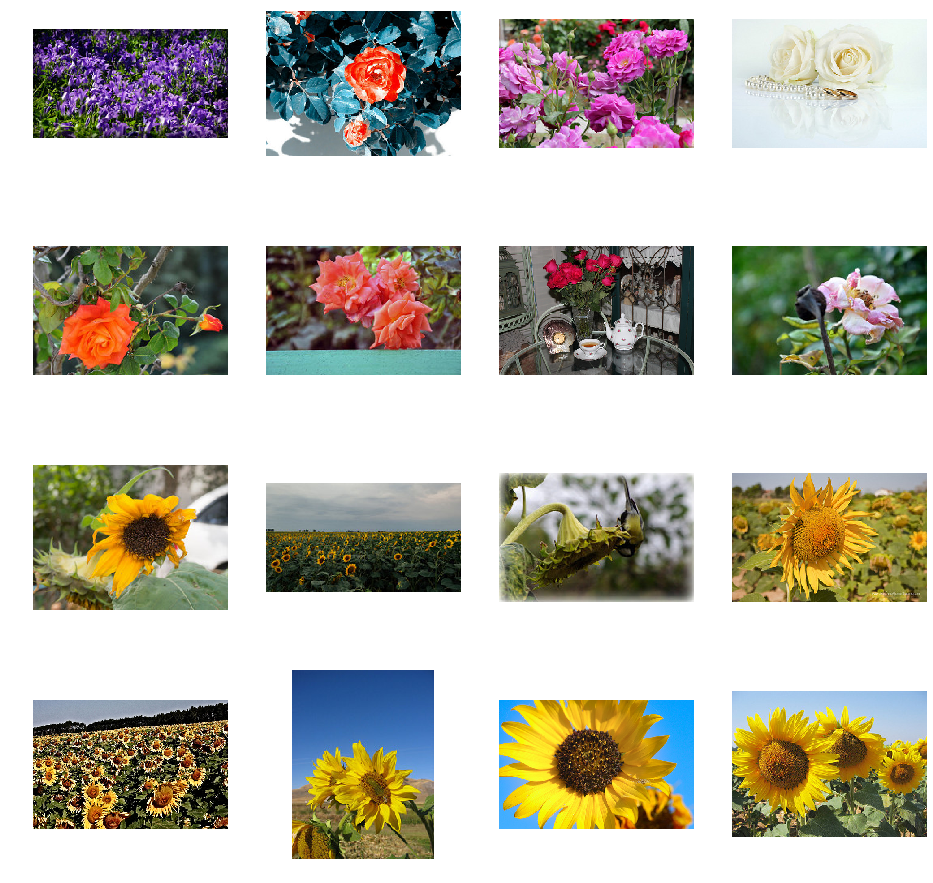

In [4]:
#%%
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


#%%
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_rose_pix = [os.path.join(train_rose_dir, fname) 
                for fname in train_rose_names[pic_index-8:pic_index]]
next_sunflower_pix = [os.path.join(train_sunflower_dir, fname) 
                for fname in train_sunflower_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_rose_pix+next_sunflower_pix):
    
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
img = mpimg.imread(next_rose_pix[0])
# print(img)
# plt.imshow(img)
print(type(img))
len(img)

<class 'numpy.ndarray'>


134

In [11]:
#%%
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])


#%%
model.summary()


#%%
from tensorflow.python.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])



Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flat

model.fit(training_images, training_labels, epochs = 5) 

In [14]:
len(training_images)

NameError: name 'training_images' is not defined